In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
ds = pd.read_csv('../MyPython/dataset/compra_en_linea.csv', sep=';')
ds.head()

,User ID,Género,Edad,Salario,Compro
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ds.isna().sum()

User ID    0
Género     0
Edad       0
Salario    0
Compro     0
dtype: int64

In [4]:
X = ds.iloc[:, [2, 3]].values  
y = ds.iloc[:, 4].values      

print("\nPrimeras 5 filas de X (Edad, Salario):\n", X[:5])
print("\nPrimeras 5 filas de y (Compro):\n", y[:5])


Primeras 5 filas de X (Edad, Salario):
 [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]

Primeras 5 filas de y (Compro):
 [0 0 0 0 0]


In [5]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("\nTamaño del conjunto de entrenamiento X_train:", len(X_train))
print("Tamaño del conjunto de prueba X_test:", len(X_test))


Tamaño del conjunto de entrenamiento X_train: 300
Tamaño del conjunto de prueba X_test: 100


In [6]:
# Escalado de características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("\nPrimeras 5 filas de X_train escalado:\n", X_train[:5])


Primeras 5 filas de X_train escalado:
 [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


In [7]:
# n_neighbors es 'K', p=2 indica Distancia Euclidiana
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

print("\nModelo KNN entrenado exitosamente.")


Modelo KNN entrenado exitosamente.


In [8]:
# Predicción de los resultados con el conjunto de prueba
y_pred = classifier.predict(X_test)

print("\nPrimeras 5 predicciones (y_pred) vs. Valores Reales (y_test):")
print("Predicciones:", y_pred[:5])
print("Reales:      ", y_test[:5])


Primeras 5 predicciones (y_pred) vs. Valores Reales (y_test):
Predicciones: [0 0 0 0 0]
Reales:       [0 0 0 0 0]


In [9]:
# Crear la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)

# Explicación:
# cm[0, 0]: Verdaderos Negativos (Predijo 0 y el valor real fue 0)
# cm[0, 1]: Falsos Positivos (Predijo 1 y el valor real fue 0)
# cm[1, 0]: Falsos Negativos (Predijo 0 y el valor real fue 1)
# cm[1, 1]: Verdaderos Positivos (Predijo 1 y el valor real fue 1)


Matriz de Confusión:
 [[64  4]
 [ 3 29]]


In [10]:
# Calcular la Precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión (Accuracy) del modelo: {accuracy:.4f}")

# Calcular el Puntaje F1 (F1-Score)
f1 = f1_score(y_test, y_pred)
print(f"Puntaje F1 del modelo: {f1:.4f}")


Precisión (Accuracy) del modelo: 0.9300
Puntaje F1 del modelo: 0.8923


C:\Users\d4vho\AppData\Local\Temp\ipykernel_26064\1405568318.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test == j, 1],


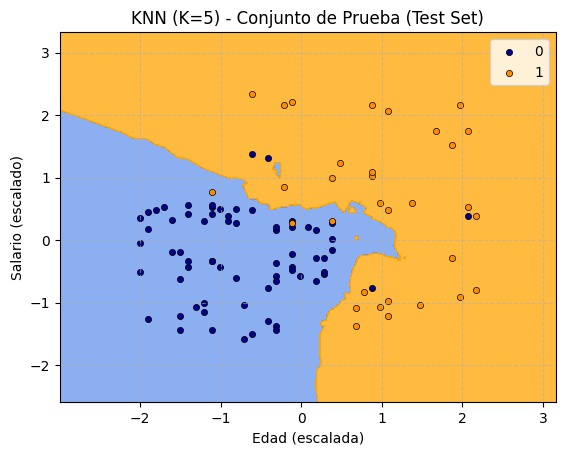

In [11]:
# 11. Visualización de los Límites de Decisión 

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set_test, y_set_test = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set_test[:, 0].min() - 1, stop = X_set_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set_test[:, 1].min() - 1, stop = X_set_test[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cornflowerblue', 'orange')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set_test)):
    plt.scatter(X_set_test[y_set_test == j, 0], X_set_test[y_set_test == j, 1],
                c = ListedColormap(('darkblue', 'darkorange'))(i), 
                label = j, s=20, edgecolor='k', linewidth=0.5)

plt.title('KNN (K=5) - Conjunto de Prueba (Test Set)')
plt.xlabel('Edad (escalada)')
plt.ylabel('Salario (escalado)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()